# D.C. Residential Properties Data

**Attribution**: *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow*, 2nd Edition, by Aurelien Geron (O'Reilly). Copyright 2019 Kiwisoft S.A.S, 978-1-492-03264-9<br>

Machine Learning Practice. Implimenting the project following the Chapter-2 project on O'REILLY's Hands-On Machine Learning. <br>

**Goal**: Predict house price, given all the other metrics. <br>
**Approach**:
<ol>
    <li>Supervised Learning task, because given labeled traning examples.</li>
    <li>Regression task, since we need to predict a value.</li>
    <li>Multiple regression problem since the system will use multiple features to make a prediction.</li>
    <li>Univariate regression problem since we are only trying to predict a single value.</li>
    <li>There is no continuous flow of data, no need to adjust to changing data, and the data is small enough to fit in memmory: Batch Learning</li>
</ol>

**Possible Performance Measure:** Root Mean Square Error (RMSE), and Mean Absolute Error (MAE). <br>
**Data:** [DC Residential Properties | Kaggle](https://www.kaggle.com/christophercorrea/dc-residential-properties)<br>
**Project Author:** Maksim Ekin Eren

## Take a Look at the Data
First, lets load the data and gain some insight about it.

In [37]:
import pandas as pd 
import os

def load_data(data_path, file_name):
    csv_path = os.path.join(data_path, file_name)
    return pd.read_csv(csv_path, low_memory=False)

housing = load_data("data", "DC_Properties.csv")
housing.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,0152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,0152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,0152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,0152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,0152,-77.040429,38.914881,NW


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158957 entries, 0 to 158956
Data columns (total 49 columns):
Unnamed: 0            158957 non-null int64
BATHRM                158957 non-null int64
HF_BATHRM             158957 non-null int64
HEAT                  158957 non-null object
AC                    158957 non-null object
NUM_UNITS             106696 non-null float64
ROOMS                 158957 non-null int64
BEDRM                 158957 non-null int64
AYB                   158686 non-null float64
YR_RMDL               80928 non-null float64
EYB                   158957 non-null int64
STORIES               106652 non-null float64
SALEDATE              132187 non-null object
PRICE                 98216 non-null float64
QUALIFIED             158957 non-null object
SALE_NUM              158957 non-null int64
GBA                   106696 non-null float64
BLDG_NUM              158957 non-null int64
STYLE                 106696 non-null object
STRUCT                106696 non-null 

There are 158957 instances, however; some attributes have missing values. This means we will have to deal with missing data later. Data consist of mix of integer, float, and object types. Because we loaded a csv, we know that object values are actually text. They are possibly categorical data. Next, lets discover what categories exist for each possible categorical attribute:

In [4]:
housing["HEAT"].value_counts()

Forced Air        53972
Hot Water Rad     47202
Warm Cool         33628
Ht Pump           21412
Wall Furnace       1120
Water Base Brd      402
Elec Base Brd       351
No Data             330
Electric Rad        144
Gravity Furnac      140
Air-Oil             117
Evp Cool             50
Ind Unit             50
Air Exchng           39
Name: HEAT, dtype: int64

We can see here that although there isn't missing row, we might encounter instances such as "No Data" that will have to be treated as missing data. Lets continue to look at all the categorical attributes:

In [6]:
housing["AC"].value_counts()

Y    114620
N     44272
0        65
Name: AC, dtype: int64

Same issue on this attribute. We have instances with "0" that will have to be treated as missing data.

In [7]:
housing["SALEDATE"].value_counts()

2007-04-10 00:00:00    413
1999-04-01 00:00:00    266
2001-01-01 00:00:00    258
2015-11-17 00:00:00    160
2010-05-04 00:00:00    134
                      ... 
1967-02-28 00:00:00      1
2002-01-21 00:00:00      1
1971-12-28 00:00:00      1
1992-09-24 00:00:00      1
1991-09-12 00:00:00      1
Name: SALEDATE, Length: 6937, dtype: int64

This attribute respresents the date of most recent sale. I might get rid of this attribute later on.

In [8]:
housing["QUALIFIED"].value_counts()

U    82608
Q    76349
Name: QUALIFIED, dtype: int64

In [9]:
housing["STYLE"].value_counts()

2 Story            81137
3 Story             9449
2.5 Story Fin       7000
1 Story             4420
1.5 Story Fin       2655
2.5 Story Unfin      729
4 Story              369
Split Level          303
Split Foyer          279
3.5 Story Fin        133
1.5 Story Unfin      112
Default               65
Bi-Level              19
4.5 Story Fin         13
3.5 Story Unfin        8
Vacant                 2
4.5 Story Unfin        2
Outbuildings           1
Name: STYLE, dtype: int64

In [10]:
housing["STRUCT"].value_counts()

Row Inside       40593
Single           32063
Semi-Detached    16756
Row End          12225
Multi             4726
Town Inside        218
Town End            85
Default             26
Vacant Land          4
Name: STRUCT, dtype: int64

In [11]:
housing["GRADE"].value_counts()

Average          37357
Above Average    32101
Good Quality     20800
Very Good         8976
Excellent         3390
Superior          2634
Exceptional-A      818
Exceptional-B      278
Fair Quality       150
Exceptional-C       92
Exceptional-D       75
No Data             19
Low Quality          6
Name: GRADE, dtype: int64

In [12]:
housing["CNDTN"].value_counts()

Average      58217
Good         37497
Very Good     8130
Excellent     1338
Fair          1320
Poor           175
Default         19
Name: CNDTN, dtype: int64

In [13]:
housing["EXTWALL"].value_counts()

Common Brick      81068
Brick/Siding       5569
Vinyl Siding       5290
Wood Siding        4540
Stucco             3216
Shingle            1181
Brick Veneer       1069
Aluminum            954
Stone               744
Brick/Stucco        673
Brick/Stone         626
Face Brick          512
Stone/Siding        339
Stone Veneer        254
Stone/Stucco        238
Hardboard           119
Concrete             82
Metal Siding         66
Concrete Block       54
Stucco Block         51
Default              32
Plywood              15
Adobe                 2
SPlaster              1
Rustic Log            1
Name: EXTWALL, dtype: int64

In [14]:
housing["ROOF"].value_counts()

Built Up          31402
Comp Shingle      30301
Metal- Sms        29957
Slate             11135
Neopren            1254
Shake               907
Clay Tile           654
Shingle             433
Metal- Pre          244
Typical             229
Composition Ro      102
Metal- Cpr           41
Concrete Tile        17
Water Proof           9
Wood- FS              7
Concrete              4
Name: ROOF, dtype: int64

In [15]:
housing["INTWALL"].value_counts()

Hardwood         83643
Hardwood/Carp    10938
Wood Floor        8170
Carpet            3563
Lt Concrete        141
Default            110
Ceramic Tile        50
Vinyl Comp          28
Parquet             19
Resiliant           15
Vinyl Sheet         13
Terrazo              6
Name: INTWALL, dtype: int64

In [17]:
housing["SOURCE"].value_counts()

Residential    106696
Condominium     52261
Name: SOURCE, dtype: int64

In [22]:
housing["ASSESSMENT_NBHD"].value_counts()

Old City 2                      15978
Old City 1                      15000
Columbia Heights                 9474
Brookland                        6568
Petworth                         6323
Deanwood                         5983
Chevy Chase                      5354
Congress Heights                 4729
Brightwood                       4112
Mt. Pleasant                     4052
Capitol Hill                     3830
Georgetown                       3774
Hillcrest                        3734
Randle Heights                   3517
Fort Dupont Park                 3425
Kalorama                         3207
Central-tri 1                    3132
Cleveland Park                   3032
Trinidad                         2964
Southwest Waterfront             2828
Riggs Park                       2795
Woodridge                        2748
American University              2594
Central-tri 3                    2500
Eckington                        2328
Forest Hills                     2225
16th Street 

In [23]:
housing["ASSESSMENT_SUBNBHD"].value_counts()

040 D Old City 2       4403
040 E Old City 2       2968
040 C Old City 2       2886
042 B Petworth         2763
039 K Old City 1       2640
                       ... 
050 A Spring Valley     176
004 C Berkley           154
025 A Georgetown        140
050 D Spring Valley     131
025 C Georgetown         91
Name: ASSESSMENT_SUBNBHD, Length: 121, dtype: int64

In [26]:
housing["WARD"].value_counts()

Ward 6    23973
Ward 3    23688
Ward 4    22202
Ward 2    22167
Ward 5    21359
Ward 1    17455
Ward 7    17206
Ward 8    10906
Name: WARD, dtype: int64

In [28]:
housing["QUADRANT"].value_counts()

NW    89736
NE    37675
SE    27224
SW     4085
Name: QUADRANT, dtype: int64

In [62]:
housing["NATIONALGRID"].value_counts()

18S UJ 28168 01936    5
18S UJ 25398 04622    4
18S UJ 28045 01888    4
18S UJ 21962 12164    3
18S UJ 28027 01972    3
                     ..
18S UJ 21127 14830    1
18S UJ 21440 13736    1
18S UJ 31904 04476    1
18S UJ 23977 08782    1
18S UJ 28524 04412    1
Name: NATIONALGRID, Length: 84891, dtype: int64

Attributes that we will drop are: GIS_LAST_MOD_DTTM, CITY, STATE, CENSUS_BLOCK, CENSUS_TRACT, SQUARE

In [38]:
housing.drop(["GIS_LAST_MOD_DTTM","CITY","STATE","CENSUS_BLOCK","CENSUS_TRACT","SQUARE","Unnamed: 0"],
            axis=1,
            inplace=True)
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158957 entries, 0 to 158956
Data columns (total 42 columns):
BATHRM                158957 non-null int64
HF_BATHRM             158957 non-null int64
HEAT                  158957 non-null object
AC                    158957 non-null object
NUM_UNITS             106696 non-null float64
ROOMS                 158957 non-null int64
BEDRM                 158957 non-null int64
AYB                   158686 non-null float64
YR_RMDL               80928 non-null float64
EYB                   158957 non-null int64
STORIES               106652 non-null float64
SALEDATE              132187 non-null object
PRICE                 98216 non-null float64
QUALIFIED             158957 non-null object
SALE_NUM              158957 non-null int64
GBA                   106696 non-null float64
BLDG_NUM              158957 non-null int64
STYLE                 106696 non-null object
STRUCT                106696 non-null object
GRADE                 106696 non-null

Now we simplified out data and get rid of the attributes that we won't need; however, there may still be attributes that we can take out of our dataset. At this point. I don't want to delete any attribute before making sure. As a result, we may take soem attributes out after we gain more insights on our data. 

Another important point we need to think is that it seems some of the float and intiger values are also categorical data. For example, zipcode can be used as a categorical data. 

Also, it seems that latitude and longtitude is entered twice. X and Y attributes are also long and lat. I am not deleting one at this point because it seems that the number of instances between two are different. First we'll have to figure out why this is happening.

Next, lets gain some insight for the numerical data:

In [39]:
housing.describe()

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,PRICE,...,FIREPLACES,USECODE,LANDAREA,CMPLX_NUM,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,X,Y
count,158957.000000,158957.000000,106696.000000,158957.000000,158957.000000,158686.000000,80928.000000,158957.000000,106652.000000,9.821600e+04,...,158957.000000,158957.000000,158957.000000,52261.000000,52261.000000,158956.000000,158956.000000,158956.000000,158720.000000,158720.000000
mean,1.810678,0.458237,1.198039,6.187736,2.732506,1941.987579,1998.243537,1963.718024,2.091793,9.313516e+05,...,2.374674,14.252999,2473.282158,2371.544249,888.834542,20012.694563,38.914854,-77.016676,-77.016712,38.914846
std,0.976396,0.587571,0.596924,2.618165,1.358864,33.640234,16.575786,24.923150,2.933323,7.061325e+06,...,737.295595,3.725736,5059.046023,1114.272364,420.185822,15.627084,0.031723,0.040938,0.040933,0.031682
min,0.000000,0.000000,0.000000,0.000000,0.000000,1754.000000,20.000000,1800.000000,0.000000,1.000000e+00,...,0.000000,11.000000,0.000000,1001.000000,0.000000,20001.000000,38.819731,-77.113909,-77.113135,38.820576
25%,1.000000,0.000000,1.000000,4.000000,2.000000,1918.000000,1985.000000,1954.000000,2.000000,2.400000e+05,...,0.000000,11.000000,697.000000,1501.000000,616.000000,20007.000000,38.895425,-77.042892,-77.042894,38.895432
50%,2.000000,0.000000,1.000000,6.000000,3.000000,1937.000000,2004.000000,1963.000000,2.000000,3.999990e+05,...,0.000000,13.000000,1649.000000,2265.000000,783.000000,20011.000000,38.915337,-77.019596,-77.019581,38.915229
75%,2.000000,1.000000,1.000000,7.000000,3.000000,1960.000000,2010.000000,1975.000000,2.000000,6.520000e+05,...,1.000000,17.000000,3000.000000,2910.000000,1060.000000,20018.000000,38.936075,-76.988626,-76.988842,38.936077
max,14.000000,11.000000,6.000000,48.000000,24.000000,2019.000000,2019.000000,2018.000000,826.000000,1.374275e+08,...,293920.000000,117.000000,942632.000000,5621.000000,8553.000000,20392.000000,38.995540,-76.909758,-76.910511,38.993646


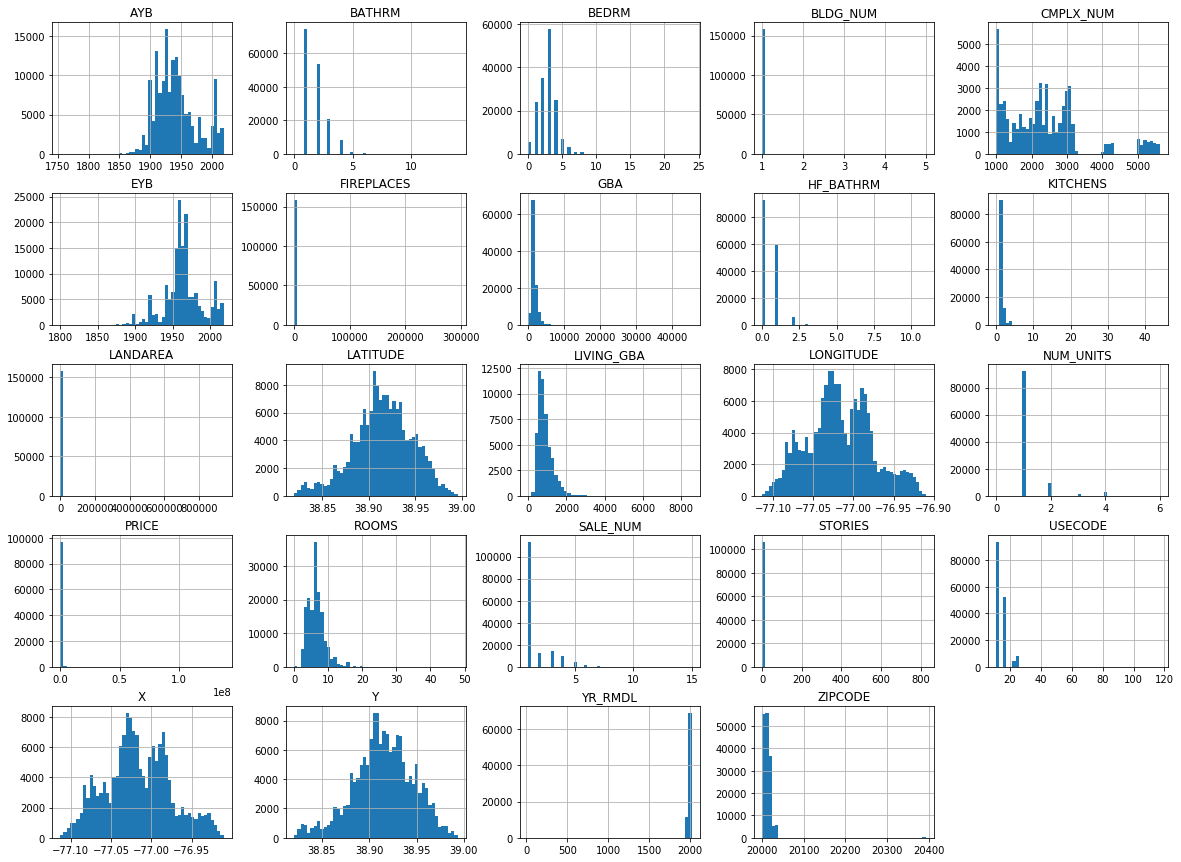

In [40]:
%matplotlib inline 
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

## Create a Test Set

Next, before continuing discovering more about the dataset, lets create a test set to avoid data snooping bias. I will use Scikit-Learn's random test train split to create the sets:

In [41]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(len(train_set))
print(len(test_set))

127165
31792


## Discover and Visualize the Data
First lets create a copy of the training set so we don't damage it accidently:

In [43]:
housing = train_set.copy()
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127165 entries, 3296 to 121958
Data columns (total 42 columns):
BATHRM                127165 non-null int64
HF_BATHRM             127165 non-null int64
HEAT                  127165 non-null object
AC                    127165 non-null object
NUM_UNITS             85481 non-null float64
ROOMS                 127165 non-null int64
BEDRM                 127165 non-null int64
AYB                   126943 non-null float64
YR_RMDL               64960 non-null float64
EYB                   127165 non-null int64
STORIES               85445 non-null float64
SALEDATE              105816 non-null object
PRICE                 78699 non-null float64
QUALIFIED             127165 non-null object
SALE_NUM              127165 non-null int64
GBA                   85481 non-null float64
BLDG_NUM              127165 non-null int64
STYLE                 85481 non-null object
STRUCT                85481 non-null object
GRADE                 85481 non-null ob

Now lets try to visulize the data:

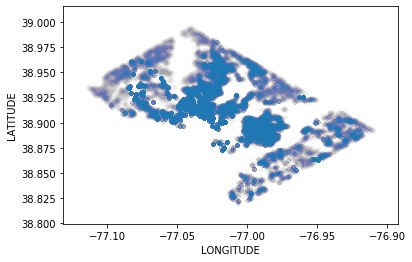

In [52]:
housing.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", alpha=0.005)

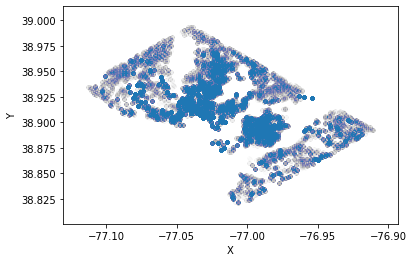

In [53]:
housing.plot(kind="scatter", x="X", y="Y", alpha=0.005)

Now we can see the density of the Residential Properties. Lets try this with heat map to discover more patterns. Lets strat with prices:

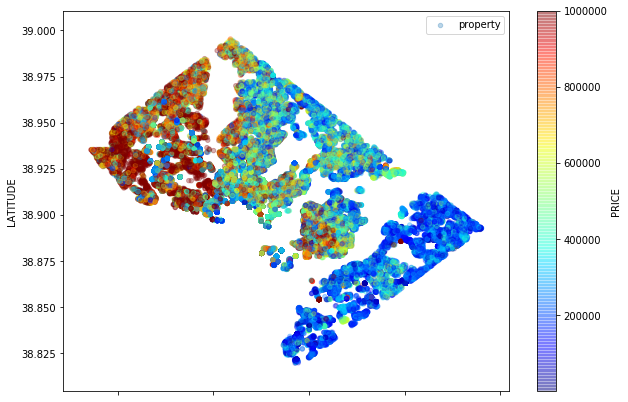

In [61]:
housing.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", alpha=0.3,
            label="property", figsize=(10,7),
            c="PRICE", cmap=plt.get_cmap("jet"), colorbar=True, vmax=1000000)
plt.legend()

Let's try to plot the heatmap on a DC map:

In [80]:
print(housing["LATITUDE"].min())
print(housing["LATITUDE"].max())
print(housing["LONGITUDE"].min())
print(housing["LONGITUDE"].max())

38.81973129
38.9954352
-77.11390873
-76.90975796


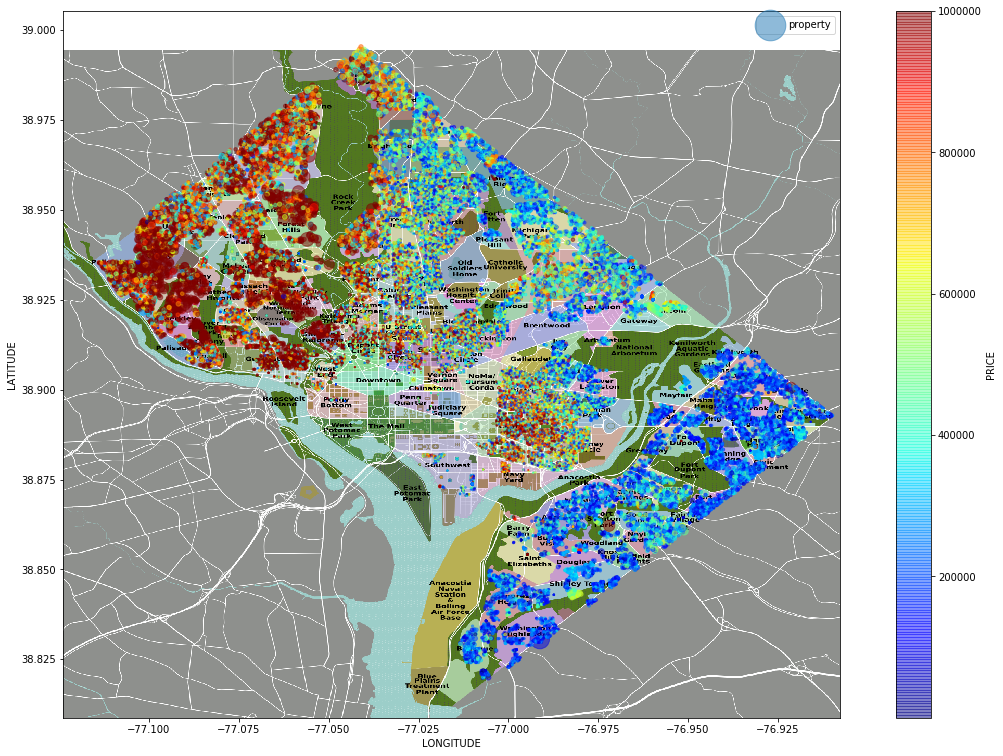

In [129]:
import urllib

#loading the png DC image found on Google
image=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/9/93/DC_neighborhoods_map.png')
dc_img=plt.imread(image)

#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(dc_img,zorder=0,extent=[-77.12390873, -76.90775796, 38.80873129, 38.9943352])
ax=plt.gca()

#using scatterplot
housing.plot(kind='scatter', x='LONGITUDE', y='LATITUDE', alpha=0.5,
            label="property", figsize=(20,13),
            ax=ax,
            s=housing["LANDAREA"]/500,
            c="PRICE", cmap=plt.get_cmap("jet"), 
            colorbar=True, zorder=5, vmax=1000000)


plt.legend()
plt.show()

Here, color represents the residential price, and the radious of the circle represents tWe can also see the landarea by itself:

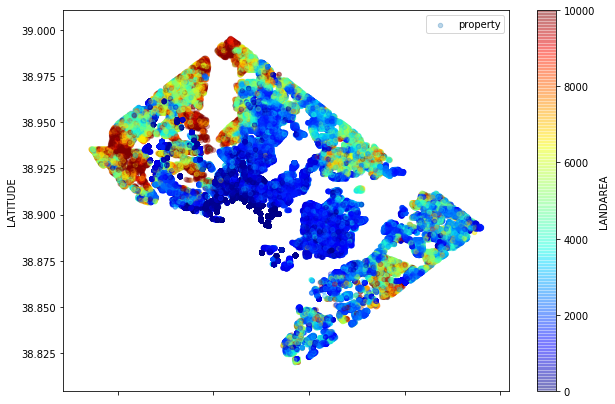

In [112]:
housing.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", alpha=0.3,
            label="property", figsize=(10,7),
            c="LANDAREA", cmap=plt.get_cmap("jet"), colorbar=True, vmax=10000)
plt.legend()

## Looking for Correlations

In [75]:
corr_matrix = housing.corr()
corr_matrix["PRICE"].sort_values(ascending=False)

PRICE         1.000000
GBA           0.608020
AYB           0.056501
EYB           0.049854
KITCHENS      0.045609
Y             0.044628
LATITUDE      0.044554
STORIES       0.041901
YR_RMDL       0.028817
FIREPLACES    0.026810
USECODE       0.026217
BLDG_NUM      0.002470
ZIPCODE       0.001516
NUM_UNITS    -0.001109
BATHRM       -0.005911
LANDAREA     -0.006994
HF_BATHRM    -0.013057
SALE_NUM     -0.015687
LIVING_GBA   -0.026214
CMPLX_NUM    -0.033176
ROOMS        -0.038212
BEDRM        -0.043571
LONGITUDE    -0.095386
X            -0.095390
Name: PRICE, dtype: float64

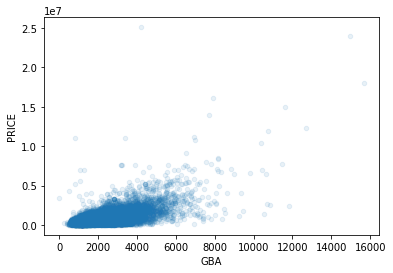

In [76]:
housing.plot(kind="scatter", x="GBA", y="PRICE", alpha=0.1)

### Lets Try Few Attribute Combinations

In [113]:
housing["bedrooms_per_room"] = housing["BEDRM"] / housing["ROOMS"]
housing["bathrooms_per_room"] = housing["BATHRM"] / housing["ROOMS"]
housing["rooms_per_stories"] = housing["ROOMS"] / housing["STORIES"]
housing["kitchens_per_room"] = housing["KITCHENS"] / housing["ROOMS"]
housing["gba_per_room"] = housing["GBA"] / housing["ROOMS"]
housing["area_per_room"] = housing["LANDAREA"] / housing["ROOMS"]

corr_matrix = housing.corr()
corr_matrix["PRICE"].sort_values(ascending=False)

PRICE                 1.000000
GBA                   0.608020
gba_per_room          0.442391
rooms_per_stories     0.137541
AYB                   0.056501
EYB                   0.049854
KITCHENS              0.045609
Y                     0.044628
LATITUDE              0.044554
STORIES               0.041901
bathrooms_per_room    0.041432
YR_RMDL               0.028817
FIREPLACES            0.026810
USECODE               0.026217
BLDG_NUM              0.002470
ZIPCODE               0.001516
NUM_UNITS            -0.001109
area_per_room        -0.004466
BATHRM               -0.005911
LANDAREA             -0.006994
HF_BATHRM            -0.013057
SALE_NUM             -0.015687
LIVING_GBA           -0.026214
CMPLX_NUM            -0.033176
ROOMS                -0.038212
BEDRM                -0.043571
bedrooms_per_room    -0.046288
LONGITUDE            -0.095386
X                    -0.095390
kitchens_per_room    -0.139071
Name: PRICE, dtype: float64